In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


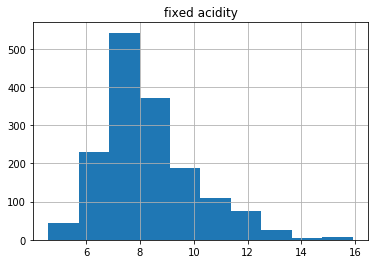

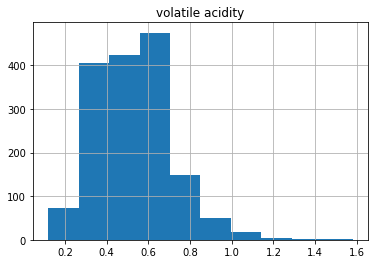

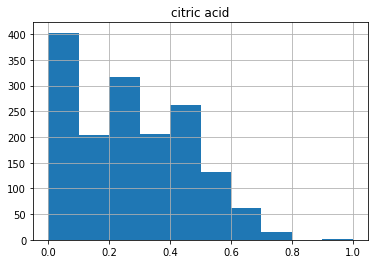

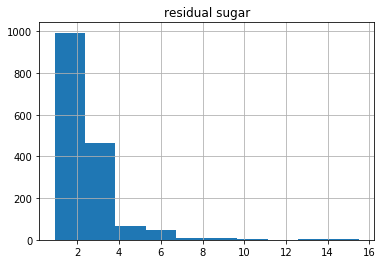

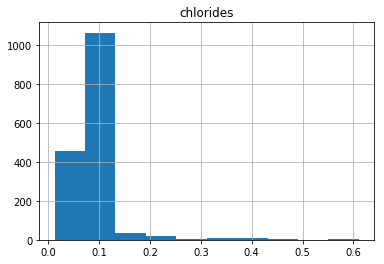

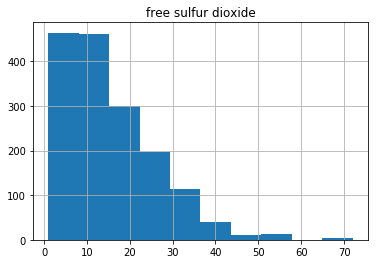

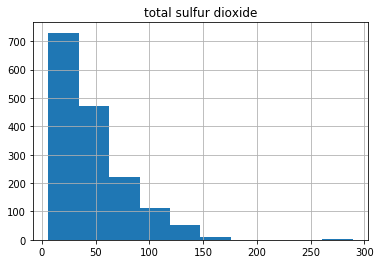

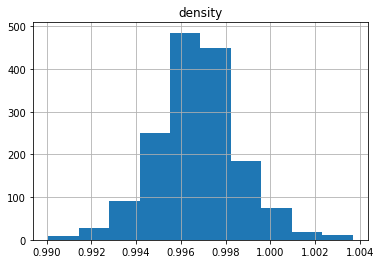

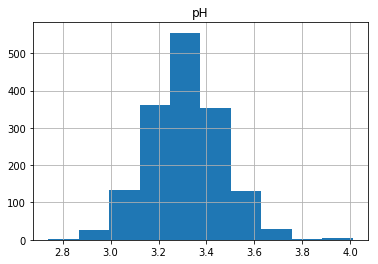

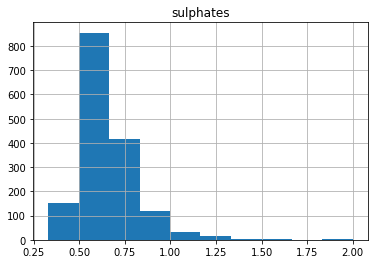

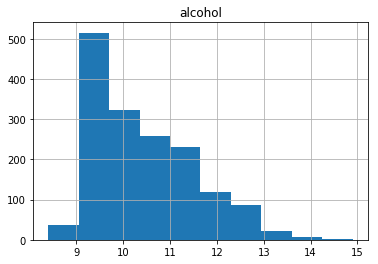

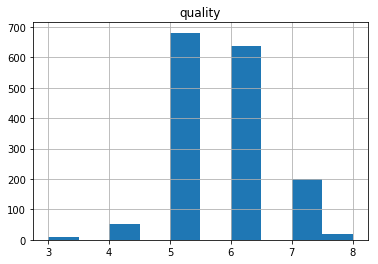

In [5]:
for c in df:
    df.hist(column=c)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf=RandomForestClassifier(n_estimators=100)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('quality',axis=1)
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [10]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
pred=rf.predict(X_test)

In [16]:
len(pred)

528

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.74      0.76      0.75       217
           6       0.60      0.71      0.65       213
           7       0.51      0.37      0.43        70
           8       0.50      0.14      0.22         7

   micro avg       0.65      0.65      0.65       528
   macro avg       0.39      0.33      0.34       528
weighted avg       0.62      0.65      0.63       528



C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
from sklearn.model_selection import GridSearchCV

In [30]:
param={'n_estimators':[50,75,100,150,175,200],'min_samples_leaf':[1,2,3,4],'max_depth':[5,8,15]}

In [31]:
cf=RandomForestClassifier()
grid=GridSearchCV(cf,param,cv=3)

In [32]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 75, 100, 150, 175, 200], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [5, 8, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
grid.best_score_

0.6694677871148459

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier(n_neighbors=6)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [41]:
pred=knn.predict(X_test)

In [42]:
pred.shape

(528,)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.05      0.09        19
           5       0.52      0.67      0.59       217
           6       0.46      0.47      0.47       213
           7       0.42      0.16      0.23        70
           8       0.00      0.00      0.00         7

   micro avg       0.49      0.49      0.49       528
   macro avg       0.28      0.23      0.23       528
weighted avg       0.46      0.49      0.46       528



C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
X2=scaler.transform(X)

In [50]:
X0=pd.DataFrame(X2,columns=X.columns)

In [51]:
X0.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [54]:
pred=knn.predict(X_test)

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.05      0.09        19
           5       0.52      0.67      0.59       217
           6       0.46      0.47      0.47       213
           7       0.42      0.16      0.23        70
           8       0.00      0.00      0.00         7

   micro avg       0.49      0.49      0.49       528
   macro avg       0.28      0.23      0.23       528
weighted avg       0.46      0.49      0.46       528



C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
df=pd.read_csv('winequality-red.csv')

In [57]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


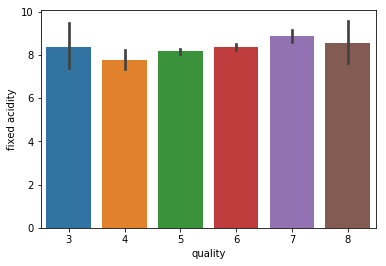

In [59]:
sns.barplot(x='quality',y='fixed acidity',data=df)

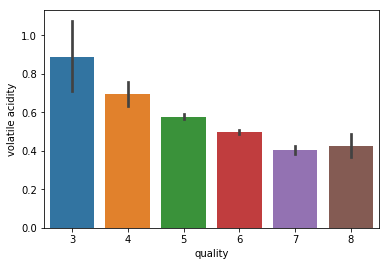

In [60]:
sns.barplot(x='quality',y='volatile acidity',data=df)

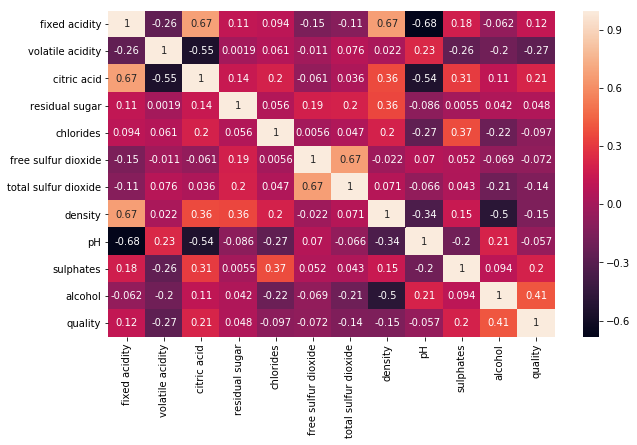

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [2]:
df=pd.read_csv('winequality-red.csv')
df['quality']=df['quality'].map({3:0,4:0,5:0,6:0,7:1,8:1})

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
label_quality = LabelEncoder()

In [3]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf=RandomForestClassifier(n_estimators=100)

In [10]:
X=df.drop('quality',axis=1)

In [11]:
y=df['quality']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [14]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
pred=rf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       346
           1       0.65      0.48      0.55        54

   micro avg       0.90      0.90      0.90       400
   macro avg       0.79      0.72      0.75       400
weighted avg       0.89      0.90      0.89       400



In [19]:
rf.score(X_test,y_test)*100

89.5

In [22]:
confusion_matrix(y_test,pred)

array([[332,  14],
       [ 28,  26]], dtype=int64)

In [23]:
from sklearn.model_selection import GridSearchCV

In [108]:
param={'n_estimators':[70,100,110,120],'max_depth':[5,10,15,20]}

In [109]:
cf=RandomForestClassifier()

In [110]:
grid=GridSearchCV(cf,param_grid=param,cv=3)

In [111]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [70, 100, 110, 120], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
grid.best_score_

0.9074228523769808

In [113]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
param=grid.predict(X_test)

In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       346
           1       1.00      0.26      0.41        54

   micro avg       0.90      0.90      0.90       400
   macro avg       0.95      0.63      0.68       400
weighted avg       0.91      0.90      0.87       400



In [117]:
confusion_matrix(y_test,pred)

array([[346,   0],
       [ 40,  14]], dtype=int64)

In [91]:
from sklearn.svm import SVC

In [92]:
model=SVC(C=1.0,gamma=0.1)

In [93]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
model.score(X_test,y_test)

0.8725

In [95]:
param={'C':[1,0.1,0.01,10,100],'gamma':[1,0.1,0.01,0.001,10]}

In [96]:
cf=SVC()

In [97]:
grid=GridSearchCV(cf,param_grid=param,cv=3)

In [99]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 0.1, 0.01, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
grid.best_score_

0.8849040867389492

In [101]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
pred=grid.predict(X_test)

In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       346
           1       1.00      0.26      0.41        54

   micro avg       0.90      0.90      0.90       400
   macro avg       0.95      0.63      0.68       400
weighted avg       0.91      0.90      0.87       400



In [107]:
confusion_matrix(y_test,pred)

array([[346,   0],
       [ 40,  14]], dtype=int64)

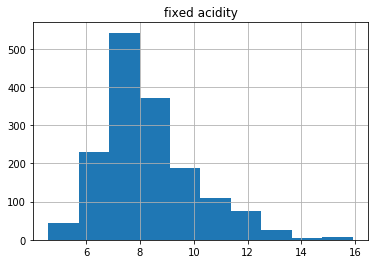

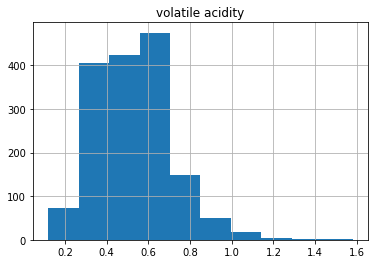

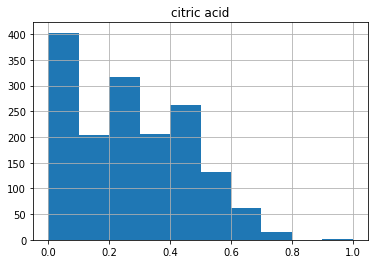

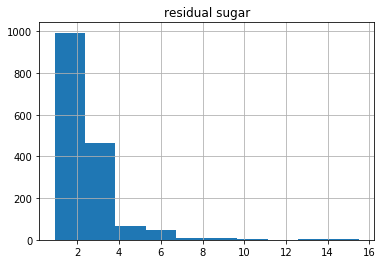

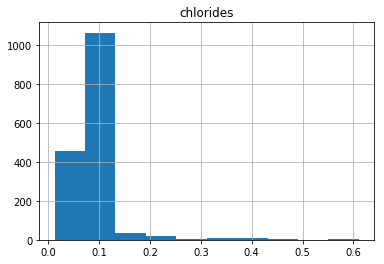

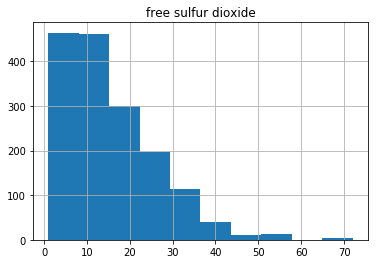

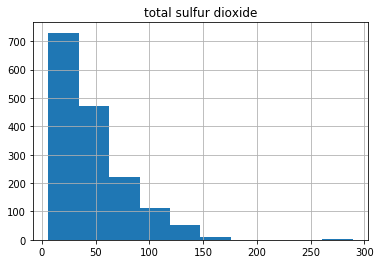

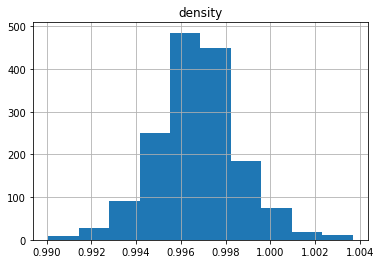

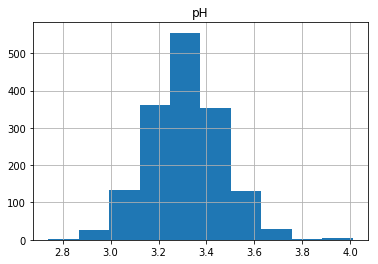

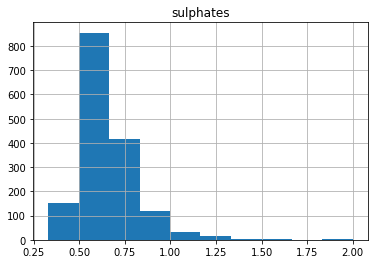

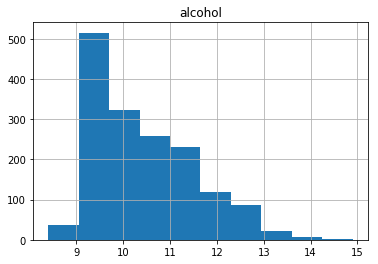

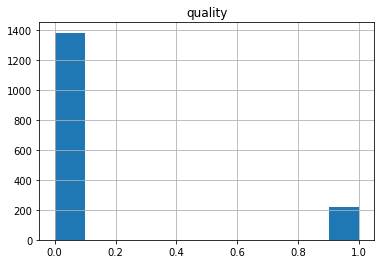

In [119]:
for c in df:
    df.hist(column=c)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [9]:
models=[LogisticRegression(),SVC(),KNeighborsClassifier(),
        RandomForestClassifier(),DecisionTreeClassifier()]

In [10]:
model_name=['LogisticRegression','SVC','KNN','RandomForest','DecisionTree']

In [15]:
acc=[]
d={}
X=df.drop('quality',axis=1)
y=df['quality']
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [16]:
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
d={'Modelling Algo':model_name,'Accuracy':acc}

In [18]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.8550
1,SVC,0.8700
2,KNN,0.8625
3,RandomForest,0.8975
4,DecisionTree,0.8625


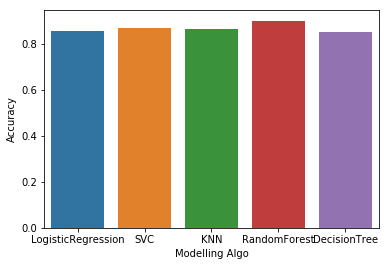

In [133]:
sns.barplot(x='Modelling Algo',y='Accuracy',data=acc_frame)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
x1=scaler.transform(X)

In [23]:
X=pd.DataFrame(x1,columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
acc=[]
d={}
from sklearn.metrics import accuracy_score

In [26]:
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
d={'Modelling Algo':model_name,'Accuracy':acc}

In [28]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.843750
1,SVC,0.862500
2,KNN,0.852083
3,RandomForest,0.887500
4,DecisionTree,0.843750


In [155]:
from sklearn.preprocessing import MinMaxScaler
X=df.drop('quality',axis=1)

In [156]:
mm=MinMaxScaler()

In [157]:
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [158]:
x1=mm.transform(X)

In [159]:
X=pd.DataFrame(x1,columns=X.columns)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [161]:
acc=[]
d={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))

d={'Modelling Algo':model_name,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Modelling Algo,Accuracy
0,LogisticRegression,0.839583
1,SVC,0.858333
2,KNN,0.864583
3,RandomForest,0.881250
4,DecisionTree,0.860417


In [29]:
X=df.drop('quality',axis=1)
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [36]:
lm=LogisticRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
print(lm.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       346
           1       0.44      0.28      0.34        54

   micro avg       0.85      0.85      0.85       400
   macro avg       0.67      0.61      0.63       400
weighted avg       0.83      0.85      0.84       400

0.855


C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=3)
clf_lr.fit(X_train,y_train)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

##### 

In [41]:
clf_lr.best_score_

0.8865721434528774

In [42]:
clf_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [69]:
model=KNeighborsClassifier()

In [70]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
pred=model.predict(X_test)

In [72]:
accuracy_score(pred,y_test)

0.8625

In [65]:
l=[i+1 for i in range(50)]
param={'n_neighbors':l,'n_jobs':[-1]}
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
grid.best_score_

0.8690575479566305

In [67]:
#cv=3
l=[i+1 for i in range(50)]
param={'n_neighbors':l}
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,cv=4)
grid.fit(X_train,y_train)
grid.best_score_

0.8715596330275229

In [68]:
grid.best_params_

{'n_neighbors': 2}

In [73]:
svm=SVC()
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
accuracy_score(pred,y_test)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.87

In [75]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
clf.best_score_

0.8949124270225187

In [78]:
pred=clf.predict(X_test)

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       346
           1       1.00      0.26      0.41        54

   micro avg       0.90      0.90      0.90       400
   macro avg       0.95      0.63      0.68       400
weighted avg       0.91      0.90      0.87       400



In [81]:
accuracy_score(pred,y_test)

0.9

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
print(confusion_matrix(y_test,pred))

[[346   0]
 [ 40  14]]
